In [1]:
import math
import datetime
import numpy as np
import pickle
import matplotlib.pyplot as plt

import methodsMLinterns
from customAutoencoder import ModelType, AutoencoderEnsemble, ExperimentPerformance

Using TensorFlow backend.


In [2]:
stocks = ['DNB', 'NRG', 'CL', 'ANTM', 'NEE', 'PAYX', 'VAR', 'NI', 'MNST', 'JNJ', 'TGNA', 'NOV', 'FIS', 'BLK', 'HBI', 'NVDA', 'DLTR', 'MRO', 'EMN', 'AMT', 'FLR', 'IBM', 'BK', 'NFX', 'AGN', 'LRCX', 'DIS', 'LH', 'C', 'MNK']

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [4]:
features_1p4_extra =['aab', 'aac', 'aad', 'aae', 'aaf', 'aag', 'aah', 'abj', 'abm', 'abn', 'abo', 'abp', 'abq', 'abr', 'abs', 'abt', 'abu', 'abv', 'abw', 'abx', 'aby', 'abz', 'aca', 'acb', 'acc', 'acd', 'ace', 'acf', 'acr', 'acw', 'acx', 'acy', 'adi', 'adj', 'adl', 'ado', 'adp', 'adq', 'adr', 'ads', 'adt', 'adu', 'adv', 'adw', 'adx', 'ady', 'adz', 'aea', 'aeb', 'aec', 'aed', 'aee', 'aef', 'aeg', 'aeh', 'aei', 'aej', 'aek', 'ael', 'aem', 'aen', 'aeo', 'aep', 'aeq', 'aer', 'aes', 'aex', 'aey', 'aez', 'afa', 'afj', 'afl', 'afo', 'afp', 'afq', 'afr', 'afs', 'aft', 'afu', 'afv', 'afw', 'afx', 'afy', 'afz', 'aga', 'agb', 'agc', 'agd', 'age', 'agf', 'agg', 'agh', 'agi', 'agj', 'agk', 'agl', 'agm', 'agn', 'ago', 'agp', 'agq', 'agr', 'ags', 'agt', 'agu', 'agv', 'agw', 'agx', 'agy', 'ahf', 'ahg', 'ahh', 'ahi', 'ahj', 'ahk', 'ahl', 'ahm', 'ahn', 'aho', 'zhq', 'zhr', 'zhs', 'zht', 'zhu', 'zhv', 'zhw', 'ziy', 'zjb', 'zjc', 'zjd', 'zje', 'zjf', 'zjg', 'zjh', 'zji', 'zjj', 'zjk', 'zjl', 'zjm', 'zjn', 'zjo', 'zjp', 'zjq', 'zjr', 'zjs', 'zjt', 'zju', 'zkg', 'zkl', 'zkm', 'zkn', 'zkx', 'zky', 'zla', 'zld', 'zle', 'zlf', 'zlg', 'zlh', 'zli', 'zlj', 'zlk', 'zll', 'zlm', 'zln', 'zlo', 'zlp', 'zlq', 'zlr', 'zls', 'zlt', 'zlu', 'zlv', 'zlw', 'zlx', 'zly', 'zlz', 'zma', 'zmb', 'zmc', 'zmd', 'zme', 'zmf', 'zmg', 'zmh', 'zmm', 'zmn', 'zmo', 'zmp', 'zmy', 'zna', 'znd', 'zne', 'znf', 'zng', 'znh', 'zni', 'znj', 'znk', 'znl', 'znm', 'znn', 'zno', 'znp', 'znq', 'znr', 'zns', 'znt', 'znu', 'znv', 'znw', 'znx', 'zny', 'znz', 'zoa', 'zob', 'zoc', 'zod', 'zoe', 'zof', 'zog', 'zoh', 'zoi', 'zoj', 'zok', 'zol', 'zom', 'zon', 'zou', 'zov', 'zow', 'zox', 'zoy', 'zoz', 'zpa', 'zpb', 'zpc', 'zpd', 'zpe']
features_1p4_extra_a=[f for f in features_1p4_extra if f[0]=='a']
features_1p4_extra_z=[f for f in features_1p4_extra if f[0]=='z']
assert(len(features_1p4_extra_a)+len(features_1p4_extra_z)==len(features_1p4_extra))

In [5]:
date_test_set = datetime.date(2016, 1, 1)

clf_portfolio_dic = methodsMLinterns.ClassificationPortfolio(stocks=stocks, minutes_forward=30)
clf_portfolio_dic.loadData()
clf_portfolio_dic.cleanUpData(features_1p4_extra)
clf_portfolio_dic.getTrainValTestShuffledDaysSetDate(date_test_set, percentageTrain=90)

DNB30 (8010, 239)
NRG30 (5368, 239)
CL30 (5187, 239)
ANTM30 (2420, 239)
NEE30 (4769, 239)
PAYX30 (5537, 239)
VAR30 (6070, 239)
NI30 (4998, 239)
MNST30 (6570, 239)
JNJ30 (5791, 239)
TGNA30 (1787, 239)
NOV30 (5057, 239)
FIS30 (6086, 239)
BLK30 (5580, 239)
HBI30 (6188, 239)
NVDA30 (5295, 239)
DLTR30 (5946, 239)
MRO30 (4767, 239)
EMN30 (5274, 239)
AMT30 (5246, 239)
FLR30 (5514, 239)
IBM30 (5742, 239)
BK30 (4715, 239)
NFX30 (5060, 239)
AGN30 (5383, 239)
LRCX30 (5568, 239)
DIS30 (5515, 239)
LH30 (6348, 239)
C30 (5429, 239)
MNK30 (4938, 239)


In [6]:
def prepareData(features):
    X_train = np.array([], dtype=np.float32).reshape(0,len(features))
    y_train = np.array([], dtype=np.float32).reshape(0,1)
    X_test = np.array([], dtype=np.float32).reshape(0,len(features))
    y_test = np.array([], dtype=np.float32).reshape(0,1)
    X_val = np.array([], dtype=np.float32).reshape(0,len(features))
    y_val = np.array([], dtype=np.float32).reshape(0,1)
    ret_train = np.array([], dtype=np.float32).reshape(0,1)
    ret_val = np.array([], dtype=np.float32).reshape(0,1)
    ret_test = np.array([], dtype=np.float32).reshape(0,1)
    
    for k, stock in enumerate(clf_portfolio_dic.stocks):
        name = stock + str(clf_portfolio_dic.minutes_forward)
        if k==0:
            X_test, y_test = clf_portfolio_dic.X_test_dic[name][features].as_matrix(), (clf_portfolio_dic.y_test_dic[name]+1)/2
            X_val, y_val = clf_portfolio_dic.X_val_dic[name][features].as_matrix(), (clf_portfolio_dic.y_val_dic[name]+1)/2
            ret_val = clf_portfolio_dic.return_val_dic[name]
            ret_test = clf_portfolio_dic.return_test_dic[name]
        else:
            X_test = np.concatenate((X_test,clf_portfolio_dic.X_test_dic[name][features].as_matrix()),axis=0)
            y_test = np.concatenate((y_test,(clf_portfolio_dic.y_test_dic[name]+1)/2),axis=0)
            X_val = np.concatenate((X_val,clf_portfolio_dic.X_val_dic[name][features].as_matrix()),axis=0)
            y_val = np.concatenate((y_val,(clf_portfolio_dic.y_val_dic[name]+1)/2),axis=0)
            ret_val = np.concatenate((ret_val,clf_portfolio_dic.return_val_dic[name]),axis=0)
            ret_test = np.concatenate((ret_test,clf_portfolio_dic.return_test_dic[name]),axis=0)
            #ret_test2 = np.concatenate((ret_test2,clf_portfolio_dic.return_test2_dic[name]),axis=0)
        X_train = clf_portfolio_dic.trainSet.drop(["stock","y","uniqueDate","ret"],axis=1)[features].as_matrix()
        y_train = (clf_portfolio_dic.trainSet["y"].as_matrix()+1)/2
        ret_train = clf_portfolio_dic.trainSet["ret"]



    
    # Transform to one hot vectors
    y_t = np.zeros((y_train.shape[0], 2))
    y_t[np.arange(y_train.shape[0]), y_train.astype('int32')] = 1
    y_train = y_t
    
    y_t = np.zeros((y_test.shape[0], 2))
    y_t[np.arange(y_test.shape[0]), y_test.astype('int32')] = 1
    y_test = y_t

    y_t = np.zeros((y_val.shape[0], 2))
    y_t[np.arange(y_val.shape[0]), y_val.astype('int32')] = 1
    y_val = y_t
    
    print(y_train.shape)
    print(y_val.shape)
    print(y_test.shape)
    return X_train, y_train, X_val, y_val, X_test, y_test, ret_train, ret_val, ret_test


In [7]:
allModels = [
    [
        ['../../../_backupscqc/weightsCV_run12/test_2017-06-29_18:40:40_z_30_f0_0',
         '../../../_backupscqc/weightsCV_run12/test_2017-06-29_18:40:40_z_30_f0_1',
         '../../../_backupscqc/weightsCV_run12/test_2017-06-29_18:40:40_z_30_f0_2'],
        [120,100,30],
        ModelType.Merged,
        "merged_z_30"
    ],
    [
        ['../../../_backupscqc/weightsCV_run13/test_2017-06-30_01:42:57_z_50_f1_0',
         '../../../_backupscqc/weightsCV_run13/test_2017-06-30_01:42:57_z_50_f1_1',
         '../../../_backupscqc/weightsCV_run13/test_2017-06-30_01:42:57_z_50_f1_2'],
        [120,100,50],
        ModelType.Merged,
        "merged_z_50"
    ],
    [
        ['../../../_backupscqc/weightsCV_run14/test_2017-06-30_08:26:37_z_70_f1_0',
         '../../../_backupscqc/weightsCV_run14/test_2017-06-30_08:26:37_z_70_f1_1',
         '../../../_backupscqc/weightsCV_run14/test_2017-06-30_08:26:37_z_70_f1_2'],
        [120,100,70],
        ModelType.Merged,
        "merged_z_70"
    ],
    [
        ['../../../_backupscqc/weightsCV_run15/test_2017-06-30_19:42:27_a_z_30_f0_0',
         '../../../_backupscqc/weightsCV_run15/test_2017-06-30_19:42:27_a_z_30_f0_1',
         '../../../_backupscqc/weightsCV_run15/test_2017-06-30_19:42:27_a_z_30_f0_2'],
        [239,100,30],
        ModelType.Merged,
        "merged_a_z_30"
    ],
    [
        ['../../../_backupscqc/weightsCV_run16/test_2017-06-30_23:30:11_a_z_50_f0_0',
         '../../../_backupscqc/weightsCV_run16/test_2017-06-30_23:30:11_a_z_50_f0_1',
         '../../../_backupscqc/weightsCV_run16/test_2017-06-30_23:30:11_a_z_50_f0_2'],
        [239,100,50],
        ModelType.Merged,
        "merged_a_z_50"
    ],
    [
        ['../../../_backupscqc/weightsCV_run17/test_2017-07-01_07:46:43_a_z_70_f0_0',
         '../../../_backupscqc/weightsCV_run17/test_2017-07-01_07:46:43_a_z_70_f0_1',
         '../../../_backupscqc/weightsCV_run17/test_2017-07-01_07:46:43_a_z_70_f0_2'],
        [239,100,70],
        ModelType.Merged,
        "merged_a_z_70"
    ],
    [
        ['../../../_backupscqc/weightsCV_run22/test_2017-07-04_01:05:04_z_30_f0_0',
         '../../../_backupscqc/weightsCV_run22/test_2017-07-04_01:05:04_z_30_f0_1',
         '../../../_backupscqc/weightsCV_run22/test_2017-07-04_01:05:04_z_30_f0_2'],
        [120,100,30],
        ModelType.End2End,
        "end2end_z_30"
    ],
    [
        ['../../../_backupscqc/weightsCV_run24/test_2017-07-05_00:16:04_z_50_f0_0',
         '../../../_backupscqc/weightsCV_run24/test_2017-07-05_00:16:04_z_50_f0_1',
         '../../../_backupscqc/weightsCV_run24/test_2017-07-05_00:16:04_z_50_f0_2'],
        [120,100,50],
        ModelType.End2End,
        "end2end_z_50"
    ],
    [
        ['../../../_backupscqc/weightsCV_run25/test_2017-07-05_04:09:06_z_70_f0_0',
         '../../../_backupscqc/weightsCV_run25/test_2017-07-05_04:09:06_z_70_f0_1',
         '../../../_backupscqc/weightsCV_run25/test_2017-07-05_04:09:06_z_70_f0_2'],
        [120,100,70],
        ModelType.End2End,
        "end2end_z_70"
    ],
    [
        ['../../../_backupscqc/weightsCV_run26/test_2017-07-05_05:14:00_a_z_30_f0_0',
         '../../../_backupscqc/weightsCV_run26/test_2017-07-05_05:14:00_a_z_30_f0_1',
         '../../../_backupscqc/weightsCV_run26/test_2017-07-05_05:14:00_a_z_30_f0_2'],
        [239,100,30],
        ModelType.End2End,
        "end2end_a_z_30"
    ],
    [
        ['../../../_backupscqc/weightsCV_run27/test_2017-07-05_10:18:51_a_z_50_f0_0',
         '../../../_backupscqc/weightsCV_run27/test_2017-07-05_10:18:51_a_z_50_f0_1',
         '../../../_backupscqc/weightsCV_run27/test_2017-07-05_10:18:51_a_z_50_f0_2'],
        [239,100,50],
        ModelType.End2End,
        "end2end_a_z_50"
    ],
    [
        ['../../../_backupscqc/weightsCV_run28/test_2017-07-05_18:21:37_a_z_70_f0_0',
         '../../../_backupscqc/weightsCV_run28/test_2017-07-05_18:21:37_a_z_70_f0_1',
         '../../../_backupscqc/weightsCV_run28/test_2017-07-05_18:21:37_a_z_70_f0_2'],
        [239,100,70],
        ModelType.End2End,
        "end2end_a_z_70"
    ]
]

"""
allModels = [
    [
        ['../../../_backupscqc/weightsCV_run32/test_2017-07-06_21:34:45_z_30_f0_0',
         '../../../_backupscqc/weightsCV_run32/test_2017-07-06_21:34:45_z_30_f0_1',
         '../../../_backupscqc/weightsCV_run32/test_2017-07-06_21:34:45_z_30_f0_2'],
        [120,90,15],
        ModelType.Merged,
        "merged_z"
    ],
    [
        ['../../../_backupscqc/weightsCV_run33/test_2017-07-07_16:43:08_z_30_f0_0',
         '../../../_backupscqc/weightsCV_run33/test_2017-07-07_16:43:08_z_30_f0_1',
         '../../../_backupscqc/weightsCV_run33/test_2017-07-07_16:43:08_z_30_f0_2'],
        [120,20,35],
        ModelType.End2End,
        "end2end_z"
    ],
    [
        ['../../../_backupscqc/weightsCV_run34/test_2017-07-08_09:45:26_a_z_30_f0_0',
         '../../../_backupscqc/weightsCV_run34/test_2017-07-08_09:45:26_a_z_30_f0_1',
         '../../../_backupscqc/weightsCV_run34/test_2017-07-08_09:45:26_a_z_30_f0_2'],
        [239,40,80],
        ModelType.End2End,
        "end2end_a_z"
    ]
]
        
        
        

,
    [
        ['weightsCV_run29/test_2017-07-05_22:20:05_a_30_f0_0',
         'weightsCV_run29/test_2017-07-05_22:20:05_a_30_f0_1',
         'weightsCV_run29/test_2017-07-05_22:20:05_a_30_f0_2'],
        [119,100,30],
        ModelType.End2End,
        "end2end_a_30"
    ],
    [
        ['weightsCV_run30/test_2017-07-05_23:56:20_a_50_f0_0',
         'weightsCV_run30/test_2017-07-05_23:56:20_a_50_f0_1',
         'weightsCV_run30/test_2017-07-05_23:56:20_a_50_f0_2'],
        [119,100,50],
        ModelType.End2End,
        "end2end_a_50"
    ],
    [
        ['weightsCV_run31/test_2017-07-06_03:14:01_a_70_f0_0',
         'weightsCV_run31/test_2017-07-06_03:14:01_a_70_f0_1',
         'weightsCV_run31/test_2017-07-06_03:14:01_a_70_f0_2'],
        [119,100,70],
        ModelType.End2End,
        "end2end_a_70"
    ]
"""    



best = []
architectures = []
types = []
models = []

for m in allModels:
    best.append(m[0])
    architectures.append(m[1])
    types.append(m[2])
    models.append(m[3])

print(len(allModels),len(best),len(architectures),len(types),len(models))

12 12 12 12 12


In [8]:
ensList = []
for i, b in enumerate(best):
    print(i)
    ensemble = AutoencoderEnsemble(b)
    ensemble.loadModels(types[i], architectures[i])
    ensList.append(ensemble)


0
../../../_backupscqc/weightsCV_run12/test_2017-06-29_18:40:40_z_30_f0_0.hdf5
../../../_backupscqc/weightsCV_run12/test_2017-06-29_18:40:40_z_30_f0_1.hdf5
../../../_backupscqc/weightsCV_run12/test_2017-06-29_18:40:40_z_30_f0_2.hdf5
1
../../../_backupscqc/weightsCV_run13/test_2017-06-30_01:42:57_z_50_f1_0.hdf5
../../../_backupscqc/weightsCV_run13/test_2017-06-30_01:42:57_z_50_f1_1.hdf5
../../../_backupscqc/weightsCV_run13/test_2017-06-30_01:42:57_z_50_f1_2.hdf5
2
../../../_backupscqc/weightsCV_run14/test_2017-06-30_08:26:37_z_70_f1_0.hdf5
../../../_backupscqc/weightsCV_run14/test_2017-06-30_08:26:37_z_70_f1_1.hdf5
../../../_backupscqc/weightsCV_run14/test_2017-06-30_08:26:37_z_70_f1_2.hdf5
3
../../../_backupscqc/weightsCV_run15/test_2017-06-30_19:42:27_a_z_30_f0_0.hdf5
../../../_backupscqc/weightsCV_run15/test_2017-06-30_19:42:27_a_z_30_f0_1.hdf5
../../../_backupscqc/weightsCV_run15/test_2017-06-30_19:42:27_a_z_30_f0_2.hdf5
4
../../../_backupscqc/weightsCV_run16/test_2017-06-30_23:30:1

In [26]:
def testOnSeparateStocks(autoList):
    _,_,x_test2,y_test2,x_test,y_test,_,ret_test2,ret_test = prepareData(features_1p4_extra)

    n = len(autoList)
    acc_test_autoencoder = np.zeros((n,))
    ret_test_autoencoder = np.zeros((12,n,2))
    acc_test_autoencoder2 = np.zeros((n,))
    acc_test_autoencoder3 = np.zeros((n,))
    acc_test4 = np.zeros((2,n))
    acc_test5 = np.zeros((2,n,2))
    acc_test6 = np.zeros((2,n,2))

    # compute accuracies
    y_pred_test = np.zeros((n,y_test.shape[0],2))
    y_pred_test2 = np.zeros((n,y_test.shape[0],2))
    y_pred_test3 = np.zeros((n,y_test.shape[0],2))
    y_pred2_test = np.zeros((n,y_test2.shape[0],2))
    y_pred2_test2 = np.zeros((n,y_test2.shape[0],2))
    y_pred2_test3 = np.zeros((n,y_test2.shape[0],2))
    masks = np.zeros((n,y_test.shape[0]),dtype=bool)
    masks2 = np.zeros((n,y_test2.shape[0]),dtype=bool)

    for i, a in enumerate(autoList):
        print(i)
        hardVoting, softVoting, _, unanimityVoting,_ = a.predict(x_test)
        y_pred_test[i,:,:] = softVoting
        y_pred_test2[i,:,:] = unanimityVoting
        y_pred_test3[i,:,:] = hardVoting
        hardVoting2, softVoting2, _, unanimityVoting2,_ = a.predict(x_test2)
        y_pred2_test[i,:,:] = softVoting2
        y_pred2_test2[i,:,:] = unanimityVoting2
        y_pred2_test3[i,:,:] = hardVoting2

        acc_test = (100 * (np.argmax(y_pred_test[i,:,:],1) == np.argmax(y_test,1))).mean()
        ret_test_autoencoder[0,i,0] = ((np.argmax(y_pred_test[i,:,:],1)*2-1)*ret_test).sum()
        ret_test_autoencoder[0,i,1] = ret_test_autoencoder[0,i,0]/y_test.shape[0]
        acc_test_autoencoder[i] = acc_test

        masks[i,:] = np.sum(y_pred_test2[i,:,:],axis=1)>0
        masks2[i,:] = np.sum(y_pred2_test2[i,:,:],axis=1)>0
        acc_test2 = (100 * (np.argmax((y_pred_test2[i,:,:])[masks[i,:]],1) == np.argmax(y_test[masks[i,:]],1))).mean()
        ret_test_autoencoder[1,i,0] = ((np.argmax((y_pred_test2[i,:,:])[masks[i,:]],1)*2-1)*ret_test[masks[i,:]]).sum()
        ret_test_autoencoder[1,i,1] = ret_test_autoencoder[1,i,0]/np.sum(masks[i,:])
        acc_test_autoencoder2[i] = acc_test2

        acc_test3 = (100 * (np.argmax(y_pred_test3[i,:,:],1) == np.argmax(y_test,1))).mean()
        ret_test_autoencoder[2,i,0] = ((np.argmax(y_pred_test3[i,:,:],1)*2-1)*ret_test).sum()
        ret_test_autoencoder[2,i,1] = ret_test_autoencoder[2,i,0]/y_test.shape[0]
        acc_test_autoencoder3[i] = acc_test3
    
    # if not yet sorted
    #ms = np.ones((n,n),dtype=bool).tolist()
    # else load from file
    with open("pickles/masks.p",'rb') as f:
        ms = pickle.load(f)
    #print(models[np.sum(np.array(ms),axis=0).astype('int32')])
    
    
    # Soft of Soft
    for i,m in enumerate(ms):
        softVoting = np.sum(y_pred_test[m],axis=0)
        acc_test4[0,i] = (100 * (np.argmax(softVoting,1) == np.argmax(y_test,1))).mean()
        ret_test_autoencoder[3,i,0] = ((np.argmax(softVoting,1)*2-1)*ret_test).sum()
        ret_test_autoencoder[3,i,1] = ret_test_autoencoder[3,i,0]/y_test.shape[0]
    for i,m in enumerate(ms):
        softVoting = np.sum(y_pred2_test[m],axis=0)
        acc_test4[1,i] = (100 * (np.argmax(softVoting,1) == np.argmax(y_test2,1))).mean()
        ret_test_autoencoder[9,i,0] = ((np.argmax(softVoting,1)*2-1)*ret_test2).sum()
        ret_test_autoencoder[9,i,1] = ret_test_autoencoder[9,i,0]/y_test2.shape[0]
       
    # Una of Soft
    for i,m in enumerate(ms):
        unanimityVotingIndex1 = np.sum(np.argmax(y_pred_test[m],axis=2),axis=0)==0
        unanimityVotingIndex2 = np.sum(np.argmax(y_pred_test[m],axis=2),axis=0)==np.sum(m)
        unanimityVoting = np.zeros((unanimityVotingIndex1.shape[0], 2))
        unanimityVoting[:,0] = unanimityVotingIndex1.astype('int32')
        unanimityVoting[:,1] = unanimityVotingIndex2.astype('int32')
        mask = np.sum(unanimityVoting,axis=1)>0
        acc_test5[0,i,1] = mask.sum()/y_pred_test.shape[1]
        print("unanimity of soft reduction factor ",i,acc_test5[0,i,1])
        acc_test5[0,i,0] = (100 * (np.argmax(unanimityVoting[mask],1) == np.argmax(y_test[mask],1))).mean()
        ret_test_autoencoder[4,i,0] = ((np.argmax(unanimityVoting[mask],1)*2-1)*ret_test[mask]).sum()
        ret_test_autoencoder[4,i,1] = ret_test_autoencoder[4,i,0]/np.sum(mask)
    for i,m in enumerate(ms):
        unanimityVotingIndex1 = np.sum(np.argmax(y_pred2_test[m],axis=2),axis=0)==0
        unanimityVotingIndex2 = np.sum(np.argmax(y_pred2_test[m],axis=2),axis=0)==np.sum(m)
        unanimityVoting = np.zeros((unanimityVotingIndex1.shape[0], 2))
        unanimityVoting[:,0] = unanimityVotingIndex1.astype('int32')
        unanimityVoting[:,1] = unanimityVotingIndex2.astype('int32')
        mask = np.sum(unanimityVoting,axis=1)>0
        acc_test5[1,i,1] = mask.sum()/y_pred2_test.shape[1]
        print("unanimity of soft reduction factor ",i,acc_test5[1,i,1])
        acc_test5[1,i,0] = (100 * (np.argmax(unanimityVoting[mask],1) == np.argmax(y_test2[mask],1))).mean()
        ret_test_autoencoder[10,i,0] = ((np.argmax(unanimityVoting[mask],1)*2-1)*ret_test2[mask]).sum()
        ret_test_autoencoder[10,i,1] = ret_test_autoencoder[10,i,0]/np.sum(mask)

    
    # Una of una
    for i,m in enumerate(ms):
        restrictedMask = np.sum(masks[m],axis=0)==np.sum(m)
        print(np.sum(restrictedMask)/y_pred_test.shape[1])
        unanimityVotingIndex1 = np.sum(np.argmax(y_pred_test2[m],axis=2),axis=0)==0
        unanimityVotingIndex2 = np.sum(np.argmax(y_pred_test2[m],axis=2),axis=0)==np.sum(m)
        unanimityVoting = np.zeros((unanimityVotingIndex1.shape[0], 2))
        unanimityVoting[:,0] = unanimityVotingIndex1.astype('int32')
        unanimityVoting[:,1] = unanimityVotingIndex2.astype('int32')
        mask = np.sum(unanimityVoting,axis=1)>0
        mask = np.logical_and(restrictedMask,mask)
        acc_test6[0,i,1] = mask.sum()/y_pred_test.shape[1]
        print("unanimity of unanimity reduction factor ",acc_test6[0,i,1])
        acc_test6[0,i,0] = (100 * (np.argmax(unanimityVoting[mask],1) == np.argmax(y_test[mask],1))).mean()
        ret_test_autoencoder[5,i,0] = ((np.argmax(unanimityVoting[mask],1)*2-1)*ret_test[mask]).sum()
        ret_test_autoencoder[5,i,1] = ret_test_autoencoder[5,i,0]/np.sum(mask)
    for i,m in enumerate(ms):
        restrictedMask = np.sum(masks2[m],axis=0)==np.sum(m)
        print(np.sum(restrictedMask)/y_pred2_test.shape[1])
        unanimityVotingIndex1 = np.sum(np.argmax(y_pred2_test2[m],axis=2),axis=0)==0
        unanimityVotingIndex2 = np.sum(np.argmax(y_pred2_test2[m],axis=2),axis=0)==np.sum(m)
        unanimityVoting = np.zeros((unanimityVotingIndex1.shape[0], 2))
        unanimityVoting[:,0] = unanimityVotingIndex1.astype('int32')
        unanimityVoting[:,1] = unanimityVotingIndex2.astype('int32')
        mask = np.sum(unanimityVoting,axis=1)>0
        mask = np.logical_and(restrictedMask,mask)
        acc_test6[1,i,1] = mask.sum()/y_pred2_test.shape[1]
        print("unanimity of unanimity reduction factor ",acc_test6[1,i,1])
        acc_test6[1,i,0] = (100 * (np.argmax(unanimityVoting[mask],1) == np.argmax(y_test2[mask],1))).mean()
        ret_test_autoencoder[11,i,0] = ((np.argmax(unanimityVoting[mask],1)*2-1)*ret_test2[mask]).sum()
        ret_test_autoencoder[11,i,1] = ret_test_autoencoder[11,i,0]/np.sum(mask)


    return(acc_test_autoencoder, acc_test_autoencoder2,
           acc_test_autoencoder3,acc_test4,acc_test5,acc_test6,
           ret_test_autoencoder,
           y_pred_test,y_pred_test2,y_pred_test3,y_pred2_test)



In [27]:
_,_,x_test2,y_test2,x_test,y_test,ret_train,ret_test2,ret_test = prepareData(features_1p4_extra)

(110316, 2)
(12291, 2)
(37386, 2)


In [28]:
acc_test_vec, acc_test_vec2, acc_test_vec3, acc_test4, acc_test5, acc_test6,ret_test_autoencoder, y_pred_test,y_pred_test2,y_pred_test3, y_pred2_test = testOnSeparateStocks(ensList)

(110316, 2)
(12291, 2)
(37386, 2)
0
1
2
3
4
5
6
7
8
9
10
11
unanimity of soft reduction factor  0 0.504680896592
unanimity of soft reduction factor  1 0.516262772161
unanimity of soft reduction factor  2 0.523564970845
unanimity of soft reduction factor  3 0.526560744664
unanimity of soft reduction factor  4 0.55223880597
unanimity of soft reduction factor  5 0.563660193655
unanimity of soft reduction factor  6 0.590836141871
unanimity of soft reduction factor  7 0.600438666881
unanimity of soft reduction factor  8 0.617075910769
unanimity of soft reduction factor  9 0.654844059274
unanimity of soft reduction factor  10 0.850826512598
unanimity of soft reduction factor  11 1.0
unanimity of soft reduction factor  0 0.498006671548
unanimity of soft reduction factor  1 0.510292083638
unanimity of soft reduction factor  2 0.51850947848
unanimity of soft reduction factor  3 0.521275730209
unanimity of soft reduction factor  4 0.566674802701
unanimity of soft reduction factor  5 0.5782279716

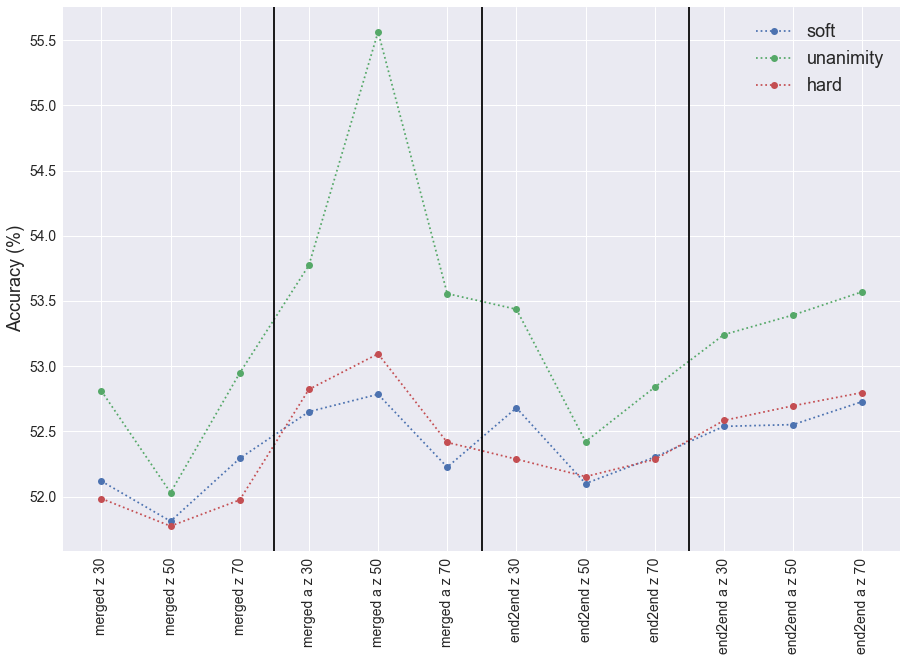

In [29]:
plt.figure(figsize=(15,10))
plt.plot(acc_test_vec,'o:',label='soft')
plt.plot(acc_test_vec2,'o:',label='unanimity')
plt.plot(acc_test_vec3,'o:',label='hard')
#plt.axhline(y=max(acc_test4[0,:]),label='max soft of soft',color='y')
#plt.axhline(y=max(acc_test5[0,:,0]),label='max una of soft',color='b')
#plt.axhline(y=max(acc_test6[0,:,0]),label='max una of una',color='c')


labels = [l.replace("_"," ") for l in models]
plt.xticks(np.arange(0,len(models)), labels, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.xlabel('L2 Regularization Parameter', fontsize=18)
plt.ylabel('Accuracy (%)', fontsize=18)
plt.legend(loc=1,prop={'size': 18})

plt.axvline(x=2.5,color='k')
plt.axvline(x=5.5,color='k')
plt.axvline(x=8.5,color='k')

plt.savefig('foo.png', bbox_inches='tight')



#plt.title("Accuracy of each model",fontsize=30)
#plt.legend()

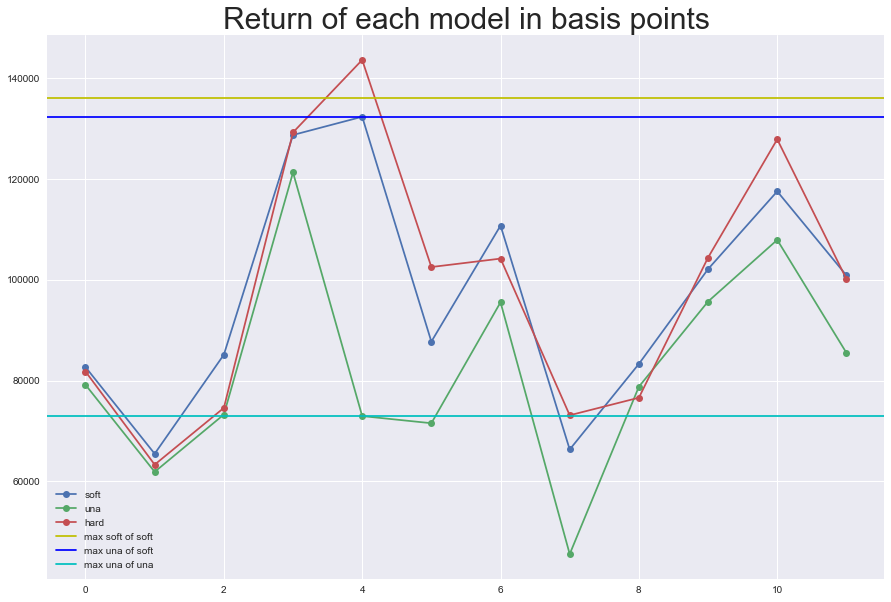

In [30]:
plt.figure(figsize=(15,10))
plt.plot(ret_test_autoencoder[0,:,0],'-o',label='soft')
plt.plot(ret_test_autoencoder[1,:,0],'-o',label='una')
plt.plot(ret_test_autoencoder[2,:,0],'-o',label='hard')
plt.axhline(y=max(ret_test_autoencoder[3,:,0]),label='max soft of soft',color='y')
plt.axhline(y=max(ret_test_autoencoder[4,:,0]),label='max una of soft',color='b')
plt.axhline(y=max(ret_test_autoencoder[5,:,0]),label='max una of una',color='c')

plt.title("Return of each model in basis points",fontsize=30)
plt.legend()

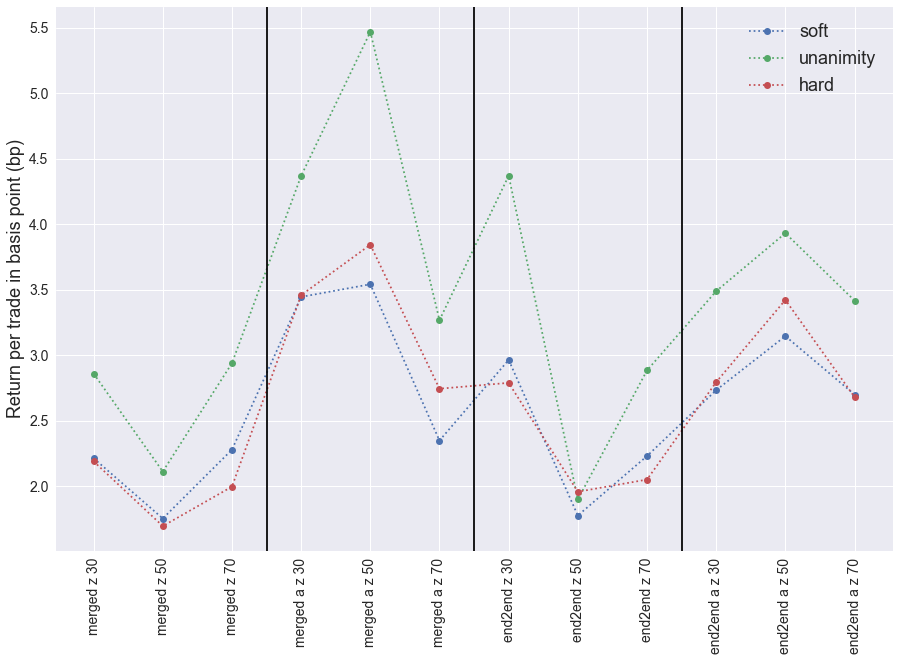

In [31]:
plt.figure(figsize=(15,10))
plt.plot(ret_test_autoencoder[0,:,1],'o:',label='soft')
plt.plot(ret_test_autoencoder[1,:,1],'o:',label='unanimity')
plt.plot(ret_test_autoencoder[2,:,1],'o:',label='hard')
#plt.axhline(y=max(ret_test_autoencoder[3,:,1]),label='max soft of soft',color='y')
#plt.axhline(y=max(ret_test_autoencoder[4,:,1]),label='max una of soft',color='b')
#plt.axhline(y=max(ret_test_autoencoder[5,:,1]),label='max una of una',color='c')

#plt.axhline(y=ret_test_autoencoder[5,8,1],ls='-.',label='max una of una',color='c')


labels = [l.replace("_"," ") for l in models]
plt.xticks(np.arange(0,len(models)), labels, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.xlabel('L2 Regularization Parameter', fontsize=18)
plt.ylabel('Return per trade in basis point (bp)', fontsize=18)
plt.legend(loc=1,prop={'size': 18})

plt.axvline(x=2.5,color='k')
plt.axvline(x=5.5,color='k')
plt.axvline(x=8.5,color='k')

plt.savefig('foo.png', bbox_inches='tight')



#plt.title("Return per trade of each model in bips",fontsize=30)
#plt.legend()

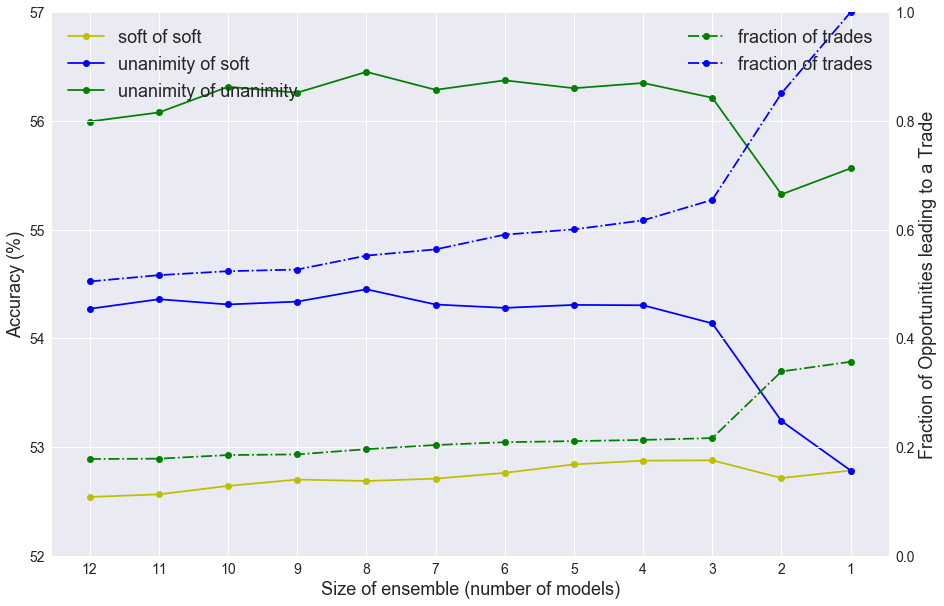

In [36]:
plt.figure(figsize=(15,10))
ax = plt.gca()
plt.plot(acc_test4[0,:],'-o',label='soft of soft',color='y')
plt.plot(acc_test5[0,:,0],'-o',label='unanimity of soft',color='b')
plt.plot(acc_test6[0,:,0],'-o',label='unanimity of unanimity',color='g')
#plt.plot(acc_test4[1,:],'-.',label='soft of soft',color='y')
#plt.plot(acc_test5[1,:,0],'-.',label='una of soft',color='b')
#plt.plot(acc_test6[1,:,0],'-.',label='una of una',color='g')
ax.legend(loc=2,prop={'size': 18})
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('Accuracy (%)', fontsize=18)
plt.xlabel('Size of ensemble (number of models)', fontsize=18)
ax.set_ylim([52,57])





ax2 = ax.twinx()
plt.plot(acc_test6[0,:,1],'-.o',label='fraction of trades',color='g')
plt.plot(acc_test5[0,:,1],'-.o',label='fraction of trades',color='b')
ax2.set_ylim([0,1])

#plt.title("Accuracy of ensembles by decreasing size",fontsize=30)
ax2.legend(loc=1,prop={'size': 18})


labels = np.arange(12,0,-1)
plt.xticks(np.arange(0,len(models)), labels, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.xlabel('L2 Regularization Parameter', fontsize=18)
plt.ylabel('Fraction of Opportunities leading to a Trade', fontsize=18)
plt.legend(loc=1,prop={'size': 18})


plt.savefig('foo.png', bbox_inches='tight')



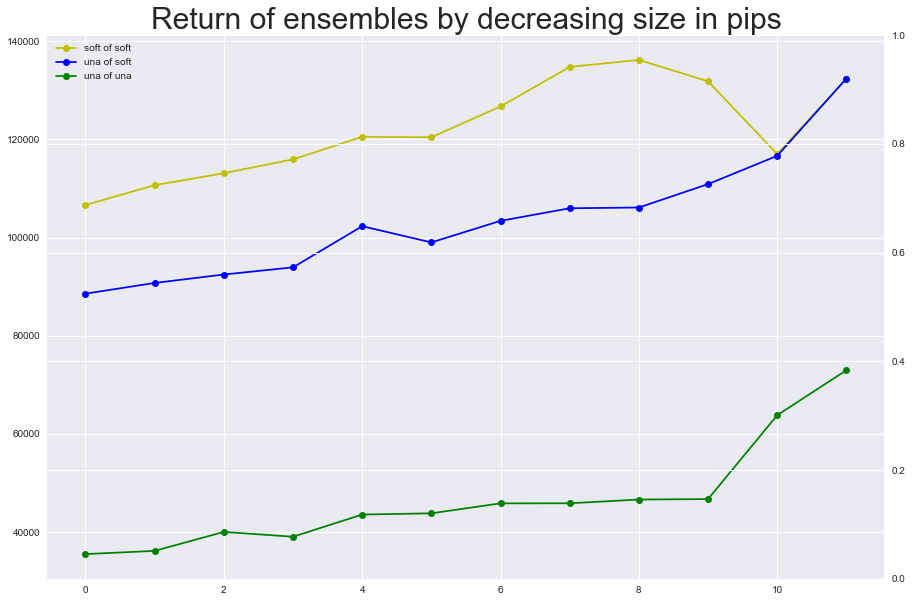

In [33]:
plt.figure(figsize=(15,10))
ax = plt.gca()
plt.plot(ret_test_autoencoder[3,:,0],'-o',label='soft of soft',color='y')
plt.plot(ret_test_autoencoder[4,:,0],'-o',label='una of soft',color='b')
plt.plot(ret_test_autoencoder[5,:,0],'-o',label='una of una',color='g')

#plt.plot(ret_test_autoencoder[9,:,0],'-.',label='soft of soft',color='y')
#plt.plot(ret_test_autoencoder[10,:,0],'-.',label='una of soft',color='b')
#plt.plot(ret_test_autoencoder[11,:,0],'-.',label='una of una',color='g')

ax.legend(loc=2)

ax2 = ax.twinx()
#plt.plot(acc_test6[0,:,1],'-.o',label='fraction of trades',color='g')
#plt.plot(acc_test5[0,:,1],'-.o',label='fraction of trades',color='b')
ax2.set_ylim([0,1])

plt.title("Return of ensembles by decreasing size in pips",fontsize=30)
ax2.legend(loc=1)

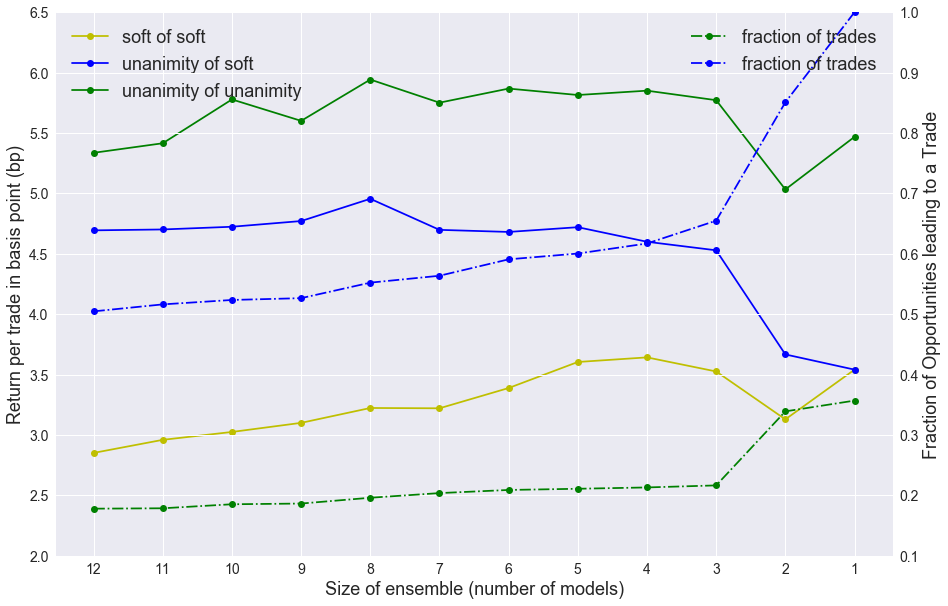

In [37]:
plt.figure(figsize=(15,10))
ax = plt.gca()
plt.plot(ret_test_autoencoder[3,:,1],'-o',label='soft of soft',color='y')
plt.plot(ret_test_autoencoder[4,:,1],'-o',label='unanimity of soft',color='b')
plt.plot(ret_test_autoencoder[5,:,1],'-o',label='unanimity of unanimity',color='g')

#plt.plot(ret_test_autoencoder[9,:,1],'-.',label='soft of soft',color='y')
#plt.plot(ret_test_autoencoder[10,:,1],'-.',label='una of soft',color='b')
#plt.plot(ret_test_autoencoder[11,:,1],'-.',label='una of una',color='g')

ax.legend(loc=2,prop={'size': 18})
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('Return per trade in basis point (bp)', fontsize=18)
plt.xlabel('Size of ensemble (number of models)', fontsize=18)
ax.set_ylim([2,6.5])


ax2 = ax.twinx()
plt.plot(acc_test6[0,:,1],'-.o',label='fraction of trades',color='g')
plt.plot(acc_test5[0,:,1],'-.o',label='fraction of trades',color='b')
ax2.set_ylim([0.1,1])

#plt.title("Return per trade of ensembles by decreasing size in pips",fontsize=30)
ax2.legend(loc=1,prop={'size': 18})


labels = np.arange(12,0,-1)
plt.xticks(np.arange(0,len(models)), labels, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.xlabel('L2 Regularization Parameter', fontsize=18)
plt.ylabel('Fraction of Opportunities leading to a Trade', fontsize=18)
plt.legend(loc=1,prop={'size': 18})


plt.savefig('foo.png', bbox_inches='tight')

In [35]:
print(np.argmax(y_pred_test,2).shape)
cm = np.corrcoef(np.argmax(y_pred_test,2))

(12, 37386)


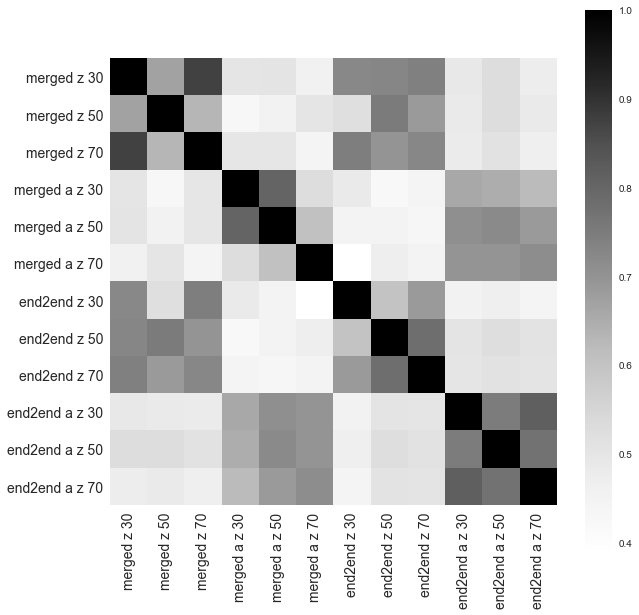

[[ 1.          0.66941205  0.87402565  0.49889534  0.50320472  0.45521986
   0.72388286  0.72819296  0.74148871  0.48934561  0.52486523  0.47631163]
 [ 0.66941205  1.          0.62993986  0.42520755  0.45334863  0.49816856
   0.52004658  0.75143327  0.68573478  0.48194333  0.52623579  0.48167095]
 [ 0.87402565  0.62993986  1.          0.49679003  0.49671035  0.4424526
   0.74616891  0.69817749  0.72547721  0.47888804  0.50864565  0.466315  ]
 [ 0.49889534  0.42520755  0.49679003  1.          0.80279667  0.52532423
   0.48344205  0.42108709  0.44074499  0.65618597  0.64825786  0.62025702]
 [ 0.50320472  0.45334863  0.49671035  0.80279667  1.          0.60493134
   0.44803445  0.44582649  0.43346056  0.70759964  0.71786834  0.68536486]
 [ 0.45521986  0.49816856  0.4424526   0.52532423  0.60493134  1.
   0.38790606  0.47068257  0.44892626  0.69827161  0.69828742  0.71303557]
 [ 0.72388286  0.52004658  0.74616891  0.48344205  0.44803445  0.38790606
   1.          0.59892932  0.68598603  0.

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(cm,interpolation='nearest')
plt.colorbar()
labels = [l.replace("_"," ") for l in models]
plt.yticks(np.arange(0,len(models)), labels)
plt.xticks(np.arange(0,len(models)), labels, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=14)

plt.gca().grid(False)
plt.savefig('foo.png', bbox_inches='tight')

plt.show()
print(cm)
print(np.sum(cm,axis=0))
print(np.sum(cm,axis=0).argsort())

## Create automatically the mask matrix

### By removing most correlated

In [11]:
k = y_pred2_test.shape[0]
m = np.ones((k,),dtype=bool).tolist()
ms = []
for i in range(k-2):
    ms.append(list(m))
    cm = np.corrcoef(np.argmax(y_pred2_test[m],2))
    argsort = np.sum(cm,axis=0).argsort()
    m[(np.arange(k)[m])[argsort[-1]]]=False
# deal with last 2
ms.append(list(m))
m[(np.arange(k)[ms[-2]])[argsort[-2]]]=False
ms.append(list(m))

with open("_pickles/masks.p",'wb') as f:
    pickle.dump( ms, f, protocol=pickle.HIGHEST_PROTOCOL)


for m in ms:
    print(m)
orderedModels = np.array(models)[(np.sum(np.array(ms),axis=0).astype('int32')-1).argsort()[::-1]]
for i,m in enumerate(orderedModels):
    print(i,m)

[True, True, True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True, True, False, True]
[False, True, True, True, True, True, True, True, True, True, False, True]
[False, True, True, True, True, True, True, True, True, False, False, True]
[False, True, True, True, True, True, True, True, False, False, False, True]
[False, True, False, True, True, True, True, True, False, False, False, True]
[False, True, False, True, False, True, True, True, False, False, False, True]
[False, True, False, True, False, True, True, False, False, False, False, True]
[False, True, False, True, False, True, True, False, False, False, False, False]
[False, False, False, True, False, True, True, False, False, False, False, False]
[False, False, False, False, False, True, True, False, False, False, False, False]
[False, False, False, False, False, True, False, False, False, False, False, False]
0 merged_a_z_70
1 end2end_z_30
2 merged_a_z_30
3 merged_z_

### By decreasing accuracy

In [25]:
k = y_pred_test.shape[0]
m = np.ones((k,),dtype=bool).tolist()
ms = []
print(acc_test_vec)
print(acc_test_vec.argsort())
print(acc_test_vec[acc_test_vec.argsort()])

argsort = acc_test_vec.argsort()
for i in range(k):
    ms.append(list(m))
    m[argsort[i]]=False

with open("pickles/masks.p",'wb') as f:
    pickle.dump( ms, f, protocol=pickle.HIGHEST_PROTOCOL)


for m in ms:
    print(m)
orderedModels = np.array(models)[(np.sum(np.array(ms),axis=0).astype('int32')-1).argsort()[::-1]]
for i,m in enumerate(orderedModels):
    print(i,m)


[ 52.11844006  51.81083828  52.29230193  52.65072487  52.78446477
  52.22543198  52.68014765  52.09971647  52.30300112  52.53838335
  52.55175734  52.72829401]
[ 1  7  0  5  2  8  9 10  3  6 11  4]
[ 51.81083828  52.09971647  52.11844006  52.22543198  52.29230193
  52.30300112  52.53838335  52.55175734  52.65072487  52.68014765
  52.72829401  52.78446477]
[True, True, True, True, True, True, True, True, True, True, True, True]
[True, False, True, True, True, True, True, True, True, True, True, True]
[True, False, True, True, True, True, True, False, True, True, True, True]
[False, False, True, True, True, True, True, False, True, True, True, True]
[False, False, True, True, True, False, True, False, True, True, True, True]
[False, False, False, True, True, False, True, False, True, True, True, True]
[False, False, False, True, True, False, True, False, False, True, True, True]
[False, False, False, True, True, False, True, False, False, False, True, True]
[False, False, False, True, Tr